In [1]:
from sys import path
path.append('../tools')
from tools import gen_inputs_outputs, gen_pair_inputs
from tensorflow import keras
from keras import layers, Sequential, Input, metrics
import matplotlib.pyplot as plt

2024-07-21 12:39:44.705654: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-21 12:39:44.714132: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-21 12:39:44.726184: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-21 12:39:44.726199: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-21 12:39:44.734173: I tensorflow/core/platform/cpu_feature_gua

In [2]:
# For these calculations, we change the input so that
# the layers are in units of 2

In [3]:
# We start with two bit calculations
R = 4
x_train, y_train, S = gen_inputs_outputs(R)
x_train = gen_pair_inputs(x_train)
x_train

{'unit_0': array([[0, 0],
        [0, 0],
        [0, 1],
        [0, 1],
        [0, 0],
        [0, 0],
        [0, 1],
        [0, 1],
        [1, 0],
        [1, 0],
        [1, 1],
        [1, 1],
        [1, 0],
        [1, 0],
        [1, 1],
        [1, 1]]),
 'unit_1': array([[0, 0],
        [0, 1],
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1],
        [1, 0],
        [1, 1],
        [0, 0],
        [0, 1],
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1],
        [1, 0],
        [1, 1]])}

In [4]:
# Creates the unit inputs
def gen_unit_inputs(l):
    return [Input(shape=(2,), name=f'unit_{i}') for i in range(l)]

# Create the units
def gen_units(unit_inputs, size, activation, use_bias):
    return [layers.Dense(size,
                         activation=activation,
                         use_bias=use_bias,
                         name=f'dense_unit_{i}')(unit_input) for i, unit_input in enumerate(unit_inputs)]

In [150]:
# Create the model
# Chose whether or not to use biases
USE_BIASES = True
# Create the inputs
inputs = gen_unit_inputs(len(x_train))

# Create the units
x = layers.concatenate(gen_units(inputs, 2, activation='relu', use_bias=USE_BIASES))

# Add dense layers
x = layers.Dense(64, activation='relu', use_bias=USE_BIASES, name='hidden_dense_1')(x)

# Ouput layer
outputs = layers.Dense(S, activation='sigmoid', use_bias=USE_BIASES, name='ouput')(x)

model = keras.Model(
    inputs=inputs,
    outputs=outputs
)

'''
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    show_layer_activations=True,
    to_file='model.png',
)'''

"\nkeras.utils.plot_model(\n    model,\n    show_shapes=True,\n    show_layer_names=True,\n    show_layer_activations=True,\n    to_file='model.png',\n)"

In [151]:
# Compile and train the moded
OPTIMIZER = 'adam'
LOSS = 'binary_crossentropy'
METRICS = ['binary_accuracy']

EPOCHS = 1000
BATCH_SIZE = 16

model.compile(
    optimizer=OPTIMIZER,
    loss=LOSS,
    metrics=METRICS,
)

from time import time

t1 = time()
history = model.fit(
    x_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)
print(time()-t1)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step - binary_accuracy: 0.5833 - loss: 0.6867
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.5625 - loss: 0.6853
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.5625 - loss: 0.6840
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.6042 - loss: 0.6826
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.6250 - loss: 0.6813
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.6042 - loss: 0.6800
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.6042 - loss: 0.6787
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.6042 - loss: 0.6774
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.6042 - loss: 0.6761
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.6458 - loss: 0.6748
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.6667 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.7292 - loss: 0.6061
Epoch 66/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.7292 - loss: 0.6047
Epoch 67/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.7292 - loss: 0.6034
Epoch 68/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.7292 - loss: 0.6020
Epoch 69/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.7500 - loss: 0.6007
Epoch 70/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.7500 - loss: 0.5993
Epoch 71/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.7500 - loss: 0.5979
Epoch 72/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.7500 - loss: 0.5965
Epoch 73/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.7500 - loss: 0.5951
Epoch 74/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.7292 - loss: 0.5937
Epoch 75/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.7500 - loss

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8125 - loss: 0.5117
Epoch 130/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8125 - loss: 0.5102
Epoch 131/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8125 - loss: 0.5086
Epoch 132/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8125 - loss: 0.5070
Epoch 133/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8125 - loss: 0.5054
Epoch 134/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8125 - loss: 0.5039
Epoch 135/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8125 - loss: 0.5023
Epoch 136/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8125 - loss: 0.5007
Epoch 137/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.8125 - loss: 0.4991
Epoch 138/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8125 - loss: 0.4975
Epoch 139/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8333 - loss: 0.4123
Epoch 194/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8333 - loss: 0.4108
Epoch 195/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.8333 - loss: 0.4093
Epoch 196/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.8333 - loss: 0.4078
Epoch 197/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8333 - loss: 0.4064
Epoch 198/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8333 - loss: 0.4049
Epoch 199/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8333 - loss: 0.4034
Epoch 200/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8333 - loss: 0.4020
Epoch 201/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8333 - loss: 0.4005
Epoch 202/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8333 - loss: 0.3990
Epoch 203/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - binary_accuracy: 0.8

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8958 - loss: 0.3237
Epoch 258/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8958 - loss: 0.3224
Epoch 259/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8958 - loss: 0.3211
Epoch 260/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8958 - loss: 0.3198
Epoch 261/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8958 - loss: 0.3185
Epoch 262/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8958 - loss: 0.3172
Epoch 263/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8958 - loss: 0.3160
Epoch 264/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8958 - loss: 0.3147
Epoch 265/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8958 - loss: 0.3135
Epoch 266/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8958 - loss: 0.3122
Epoch 267/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.8

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - binary_accuracy: 0.9583 - loss: 0.2524
Epoch 322/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9583 - loss: 0.2514
Epoch 323/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9583 - loss: 0.2504
Epoch 324/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9583 - loss: 0.2494
Epoch 325/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9583 - loss: 0.2484
Epoch 326/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9583 - loss: 0.2474
Epoch 327/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9583 - loss: 0.2464
Epoch 328/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9583 - loss: 0.2454
Epoch 329/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9583 - loss: 0.2444
Epoch 330/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9583 - loss: 0.2434
Epoch 331/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9583 - loss: 0.1943
Epoch 386/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9583 - loss: 0.1935
Epoch 387/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9583 - loss: 0.1927
Epoch 388/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9583 - loss: 0.1919
Epoch 389/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9583 - loss: 0.1911
Epoch 390/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9583 - loss: 0.1903
Epoch 391/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.9583 - loss: 0.1895
Epoch 392/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.9583 - loss: 0.1887
Epoch 393/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9583 - loss: 0.1879
Epoch 394/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9583 - loss: 0.1871
Epoch 395/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.1484
Epoch 450/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.1478
Epoch 451/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.1471
Epoch 452/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.1464
Epoch 453/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 1.0000 - loss: 0.1458
Epoch 454/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.1451
Epoch 455/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.1445
Epoch 456/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.1438
Epoch 457/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.1431
Epoch 458/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.1425
Epoch 459/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - binary_accuracy: 1.0000 - loss: 0.1126
Epoch 514/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - binary_accuracy: 1.0000 - loss: 0.1121
Epoch 515/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 1.0000 - loss: 0.1117
Epoch 516/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.1112
Epoch 517/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.1107
Epoch 518/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.1102
Epoch 519/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.1098
Epoch 520/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.1093
Epoch 521/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.1089
Epoch 522/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.1084
Epoch 523/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0860
Epoch 578/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 1.0000 - loss: 0.0856
Epoch 579/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0853
Epoch 580/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0849
Epoch 581/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0846
Epoch 582/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 1.0000 - loss: 0.0842
Epoch 583/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0839
Epoch 584/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0835
Epoch 585/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0832
Epoch 586/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 1.0000 - loss: 0.0828
Epoch 587/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - binary_accuracy: 1.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0664
Epoch 642/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0661
Epoch 643/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0658
Epoch 644/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0656
Epoch 645/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0653
Epoch 646/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0651
Epoch 647/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0648
Epoch 648/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0646
Epoch 649/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0643
Epoch 650/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0640
Epoch 651/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 1.0000 - loss: 0.0519
Epoch 706/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 1.0000 - loss: 0.0517
Epoch 707/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0515
Epoch 708/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 1.0000 - loss: 0.0513
Epoch 709/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 1.0000 - loss: 0.0511
Epoch 710/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 1.0000 - loss: 0.0509
Epoch 711/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0507
Epoch 712/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0505
Epoch 713/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 1.0000 - loss: 0.0504
Epoch 714/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 1.0000 - loss: 0.0502
Epoch 715/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0411
Epoch 770/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0409
Epoch 771/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0408
Epoch 772/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0406
Epoch 773/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0405
Epoch 774/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0404
Epoch 775/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0402
Epoch 776/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0401
Epoch 777/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0399
Epoch 778/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0398
Epoch 779/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0330
Epoch 834/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0329
Epoch 835/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0328
Epoch 836/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0327
Epoch 837/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0326
Epoch 838/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0325
Epoch 839/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0324
Epoch 840/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0323
Epoch 841/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0322
Epoch 842/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0321
Epoch 843/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - binary_accuracy: 1.0000 - loss: 0.0269
Epoch 898/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 1.0000 - loss: 0.0269
Epoch 899/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 1.0000 - loss: 0.0268
Epoch 900/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0267
Epoch 901/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0266
Epoch 902/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 1.0000 - loss: 0.0265
Epoch 903/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0264
Epoch 904/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0264
Epoch 905/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 1.0000 - loss: 0.0263
Epoch 906/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0262
Epoch 907/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0222
Epoch 962/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0221
Epoch 963/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0221
Epoch 964/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0220
Epoch 965/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0219
Epoch 966/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0219
Epoch 967/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0218
Epoch 968/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0217
Epoch 969/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0217
Epoch 970/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0216
Epoch 971/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0

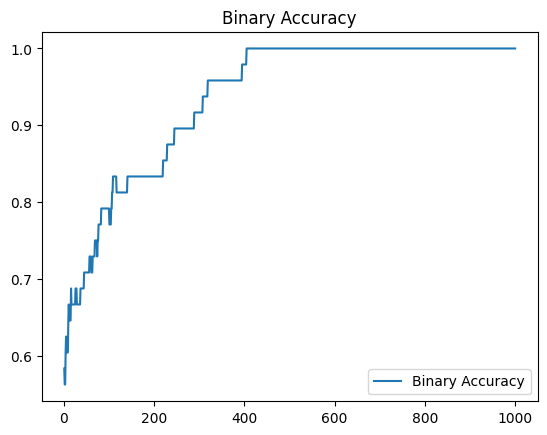

In [152]:
x_points = [i for i in range(1, EPOCHS+1)]

plt.plot(x_points, history.history['binary_accuracy'], label='Binary Accuracy')
plt.title('Binary Accuracy')
plt.legend(loc='lower right')

plt.show()